Connected to MySQL Server!
Connected to database: shop_management
Top 3 rows from CUSTOMER table:
(1, 'Alice Green', 'alice.green@example.com', '555-1234', '101 Maple St, Springfield')
(2, 'Bob White', 'bob.white@example.com', '555-9999', '202 Oak Ave, Rivertown')
(3, 'Cathy Black', 'cathy.black@example.com', '555-5848', '303 Pine Rd, Lakeside')


C:\Users\陈浩林\AppData\Local\Temp\ipykernel_20688\2674242951.py:39: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(query1, connection)


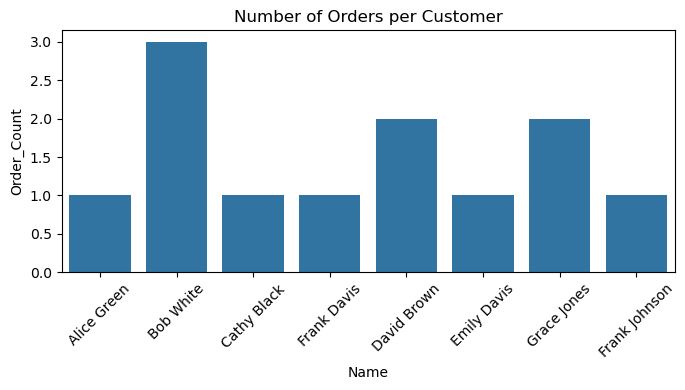

C:\Users\陈浩林\AppData\Local\Temp\ipykernel_20688\2674242951.py:54: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql(query2, connection)


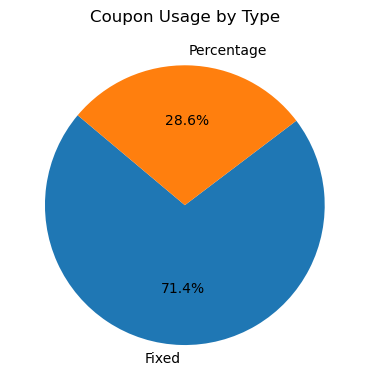

C:\Users\陈浩林\AppData\Local\Temp\ipykernel_20688\2674242951.py:69: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql(query, connection)


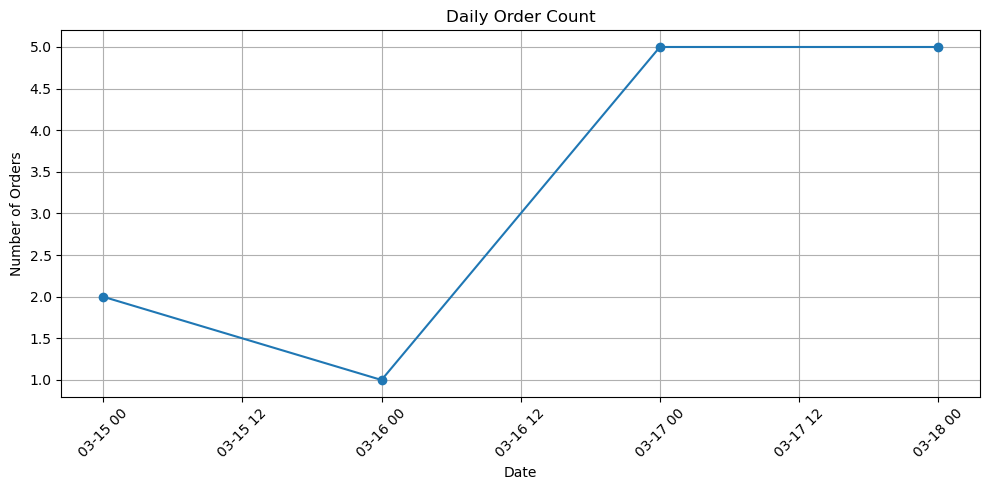

MySQL connection is closed.


In [3]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    # Connect to the database
    connection = mysql.connector.connect(
        host='localhost',
        user='root',
        password='ZXcV-1234',
        database='shop_management',
        auth_plugin='mysql_native_password'
    )

    if connection.is_connected():
        print("Connected to MySQL Server!")

        cursor = connection.cursor()
        cursor.execute("SELECT DATABASE();")
        db_name = cursor.fetchone()
        print("Connected to database:", db_name[0])

        # Basic test query: show top 3 rows from CUSTOMER table
        cursor.execute("SELECT * FROM CUSTOMER LIMIT 3;")
        results = cursor.fetchall()
        print("Top 3 rows from CUSTOMER table:")
        for row in results:
            print(row)

        # 1️ Chart: Number of Orders per Customer
        query1 = """
        SELECT c.Name, COUNT(o.Order_ID) AS Order_Count
        FROM CUSTOMER c
        JOIN `ORDER` o ON c.Customer_ID = o.Customer_ID
        GROUP BY c.Customer_ID
        """
        df1 = pd.read_sql(query1, connection)
        plt.figure(figsize=(7,4))
        sns.barplot(x='Name', y='Order_Count', data=df1)
        plt.title('Number of Orders per Customer')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # 2 Chart: Coupon Usage by Type
        query2 = """
        SELECT c.Type, COUNT(oc.Coupon_ID) AS Used_Count
        FROM ORDERCOUPON oc
        JOIN COUPON c ON oc.Coupon_ID = c.Coupon_ID
        GROUP BY c.Type
        """
        df2 = pd.read_sql(query2, connection)
        plt.figure(figsize=(7,4))
        plt.pie(df2['Used_Count'], labels=df2['Type'], autopct='%1.1f%%', startangle=140)
        plt.title('Coupon Usage by Type')
        plt.tight_layout()
        plt.show()

        # 3 Chart: Daily Order Count
        query = """
        SELECT DATE(Purchase_Time) AS Order_Date, COUNT(*) AS Order_Count
        FROM `ORDER`
        GROUP BY Order_Date
        ORDER BY Order_Date;
        """

        df3 = pd.read_sql(query, connection)
        plt.figure(figsize=(10, 5))
        plt.plot(df3['Order_Date'], df3['Order_Count'], marker='o', linestyle='-')
        plt.title('Daily Order Count')
        plt.xlabel('Date')
        plt.ylabel('Number of Orders')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

except Error as e:
    print("Error while connecting to MySQL:", e)

finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed.")
